# 1. Exploratory Data Analysis (EDA):

## Perform exploratory data analysis to understand the structure of the dataset.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 

In [2]:
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0


## Check for missing values, outliers, inconsistencies in the data.

In [3]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 78.2 KB


In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
df.isnull().sum()

RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64

In [7]:
df.drop(columns = 'K',inplace = True)

In [8]:
df.isnull().sum()

RI      785
Na      785
Mg      785
Al      785
Si      785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64

# 2: Data Visualization:
## Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

### Histogram

<Figure size 1200x800 with 0 Axes>

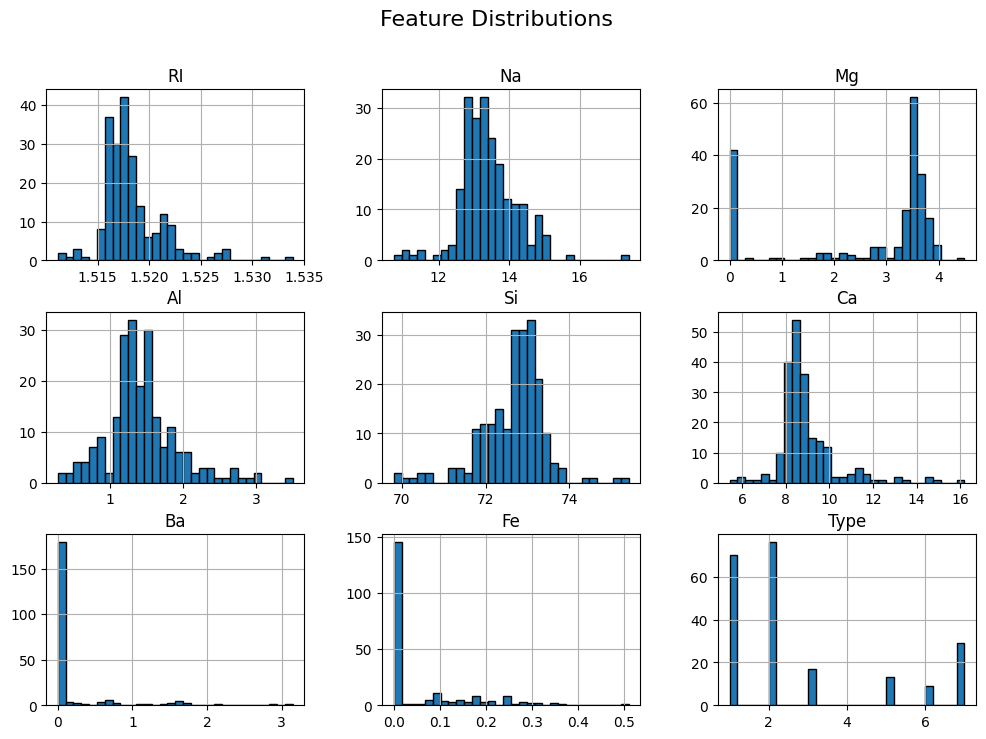

In [9]:
plt.figure(figsize=(12, 8))
df.hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

### Boxplot

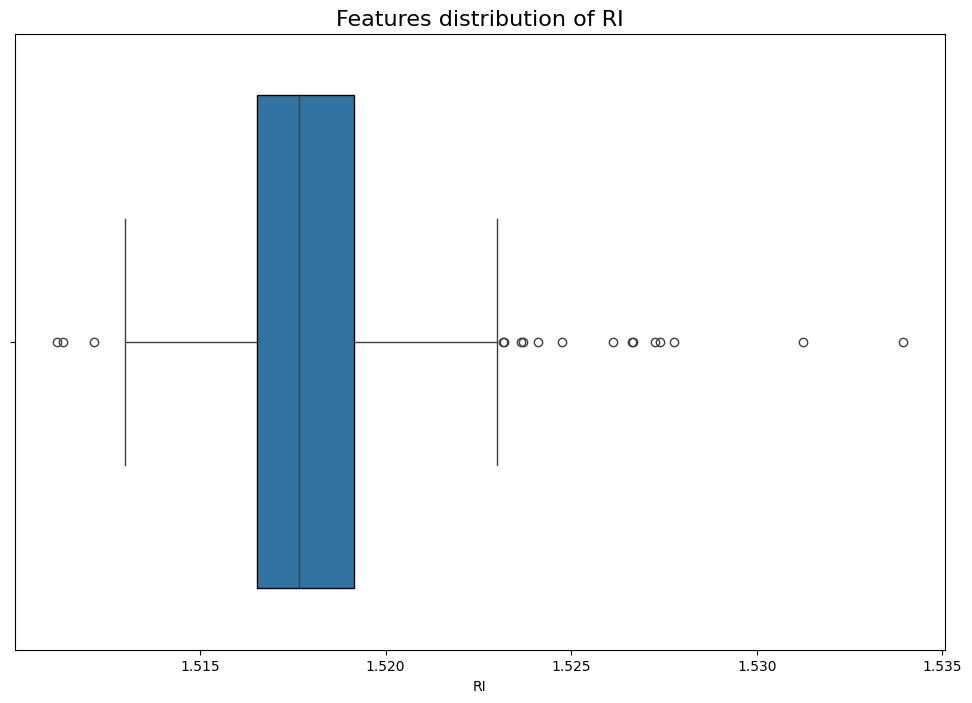

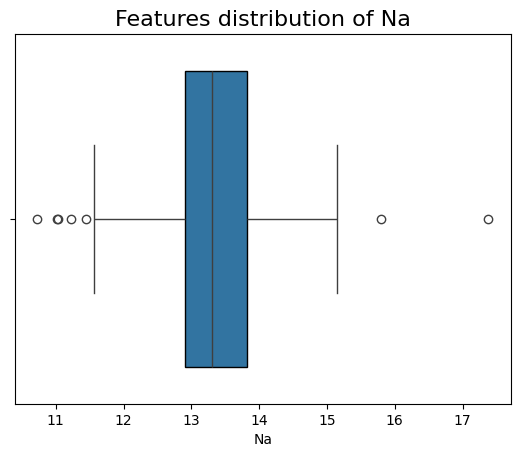

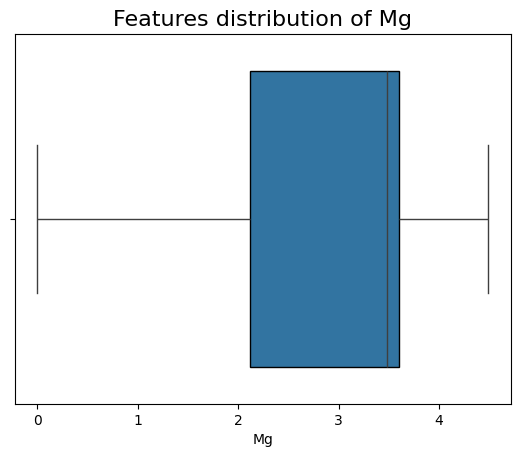

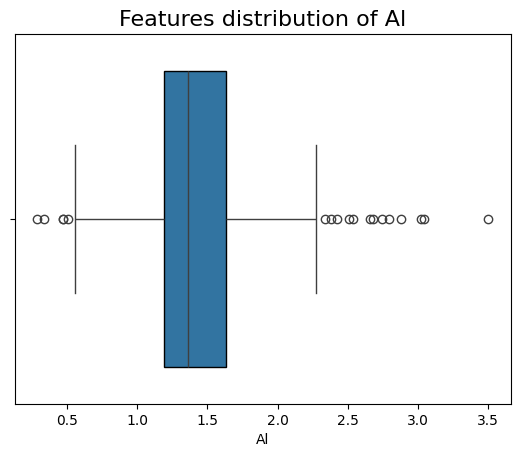

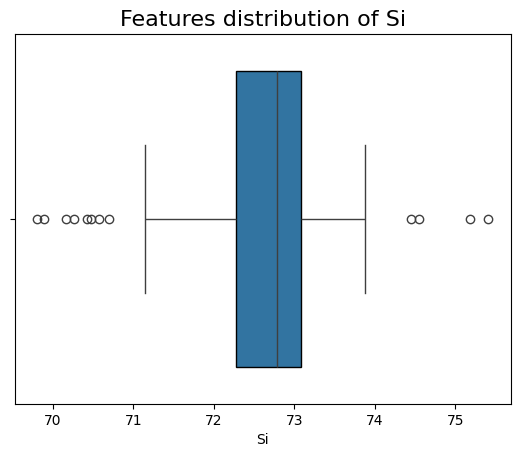

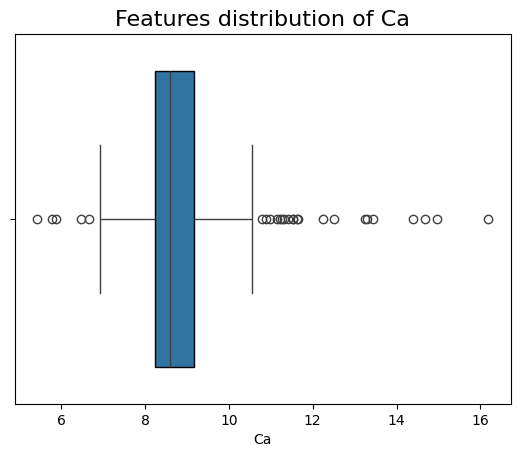

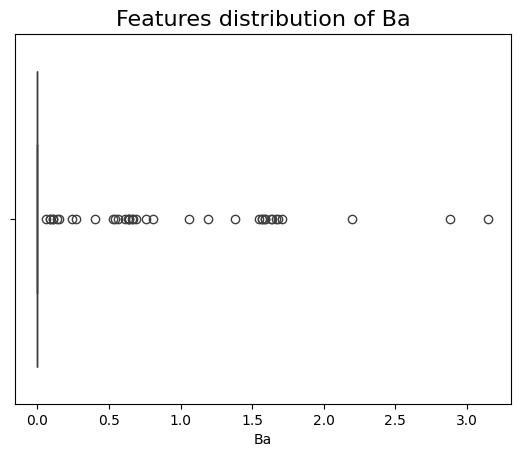

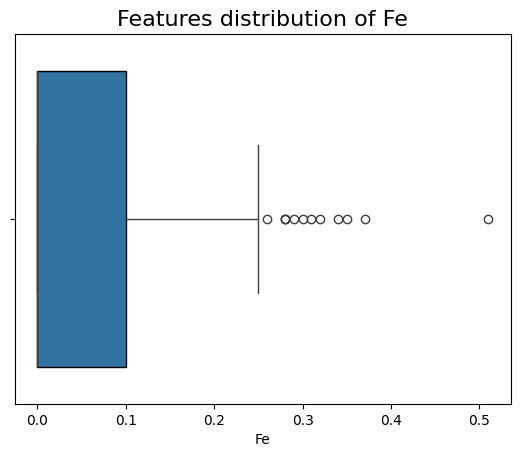

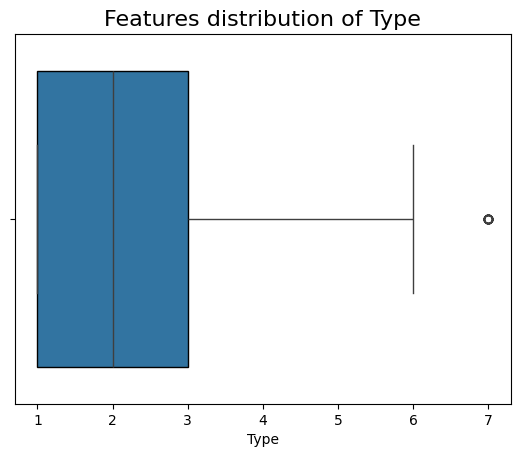

In [10]:
plt.figure(figsize = (12,8))
for column in df.columns:
    sns.boxplot(df[column], orient='h', boxprops={'edgecolor': 'black'}) 
    plt.title(f'Features distribution of {column}', fontsize=16)
    plt.show()

### pairplot

<Figure size 1000x600 with 0 Axes>

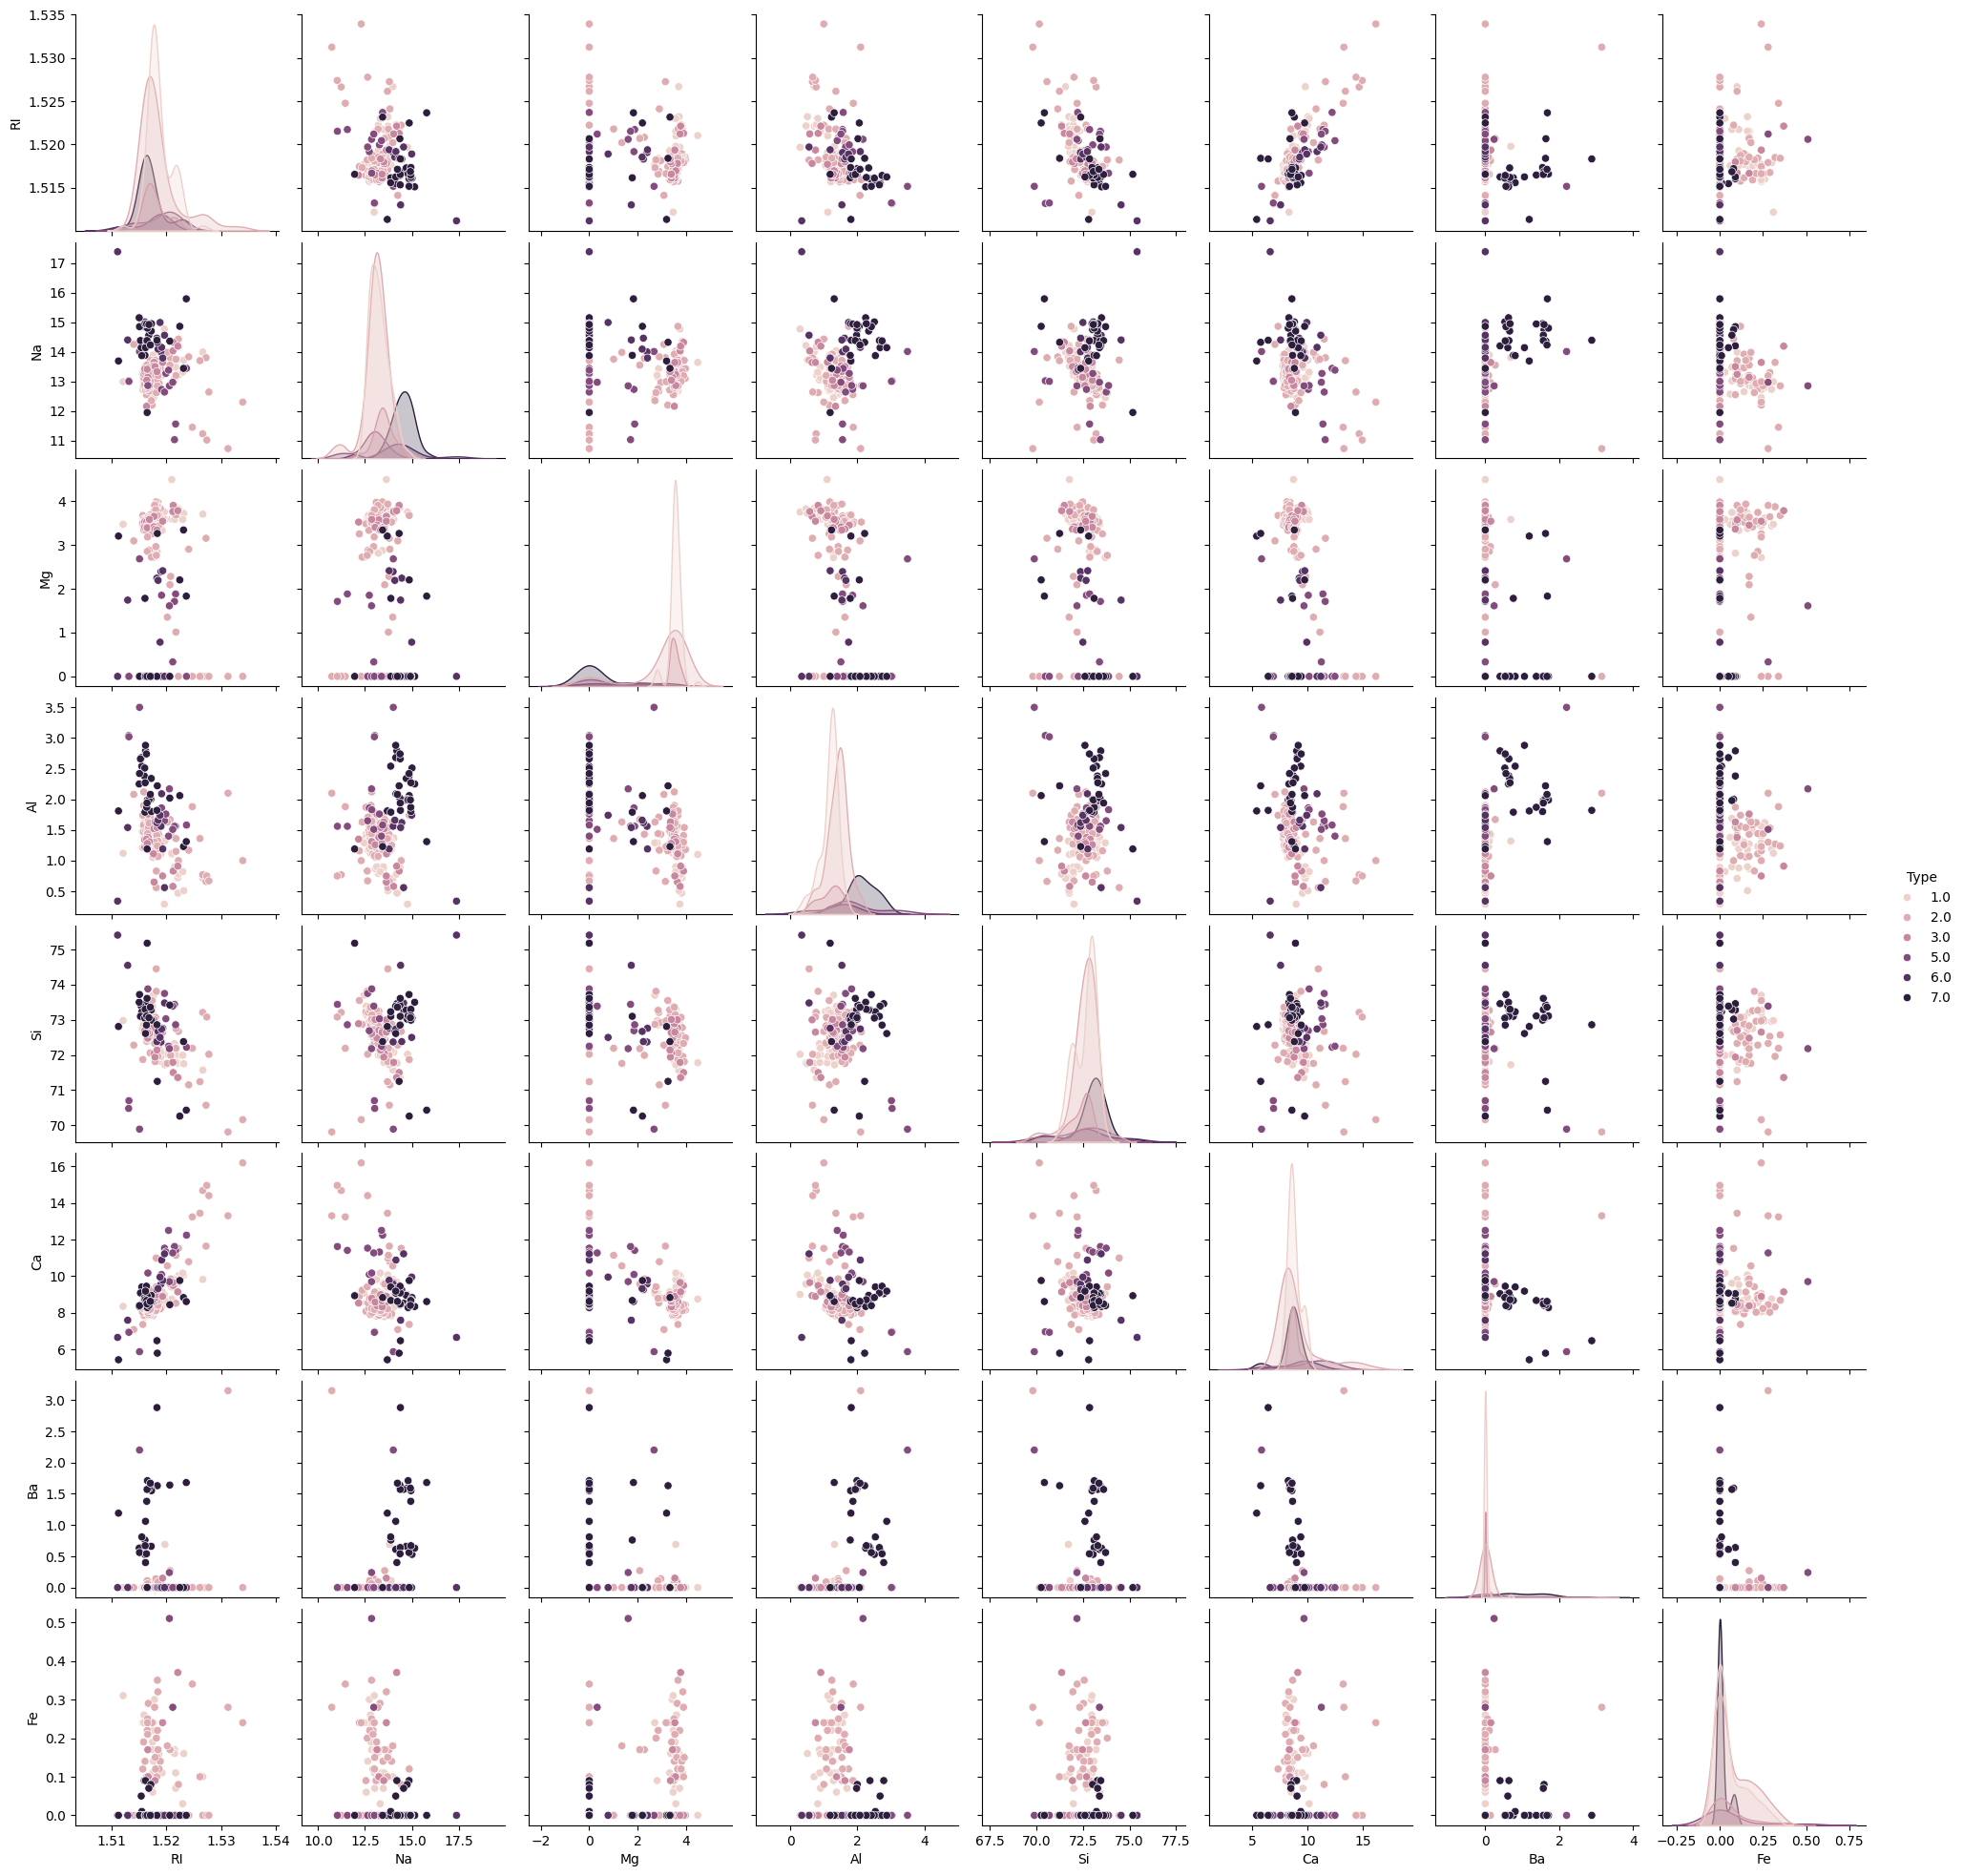

In [11]:
plt.figure(figsize = (10,6))
sns.pairplot(df,hue = 'Type')
plt.show()

## Analyze any patterns or correlations observed in the data.

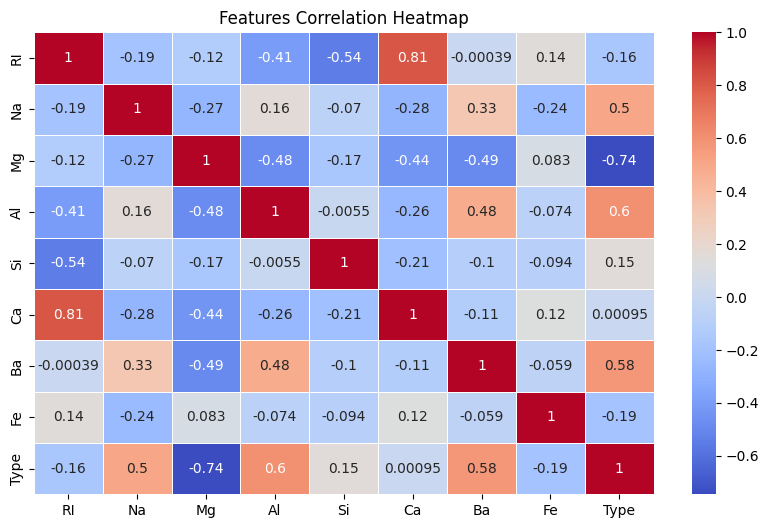

In [12]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),cmap = 'coolwarm',annot = True,linewidths = 0.5)
plt.title('Features Correlation Heatmap')
plt.show()

# 3: Data Preprocessing

## 1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.

### my reasoning is every data is not categorical values its mention of numarical values so its was romovable in median values is Zero greater then value an integer commands

In [13]:
if df.isnull().sum().sum() > 0:
    df.fillna(df.median(),inplace = True)

## 2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.

### There is no categorical variable in the datasets so doesn't apply for the encoding techniques.But likes to one hot encoding to convert into numarical format in the categorical columns  

In [14]:
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    encoder = OneHotEncoder(drop='first', sparse=False)
    encoded_features = encoder.fit_transform(df[categorical_cols])
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))
    df = df.drop(columns=categorical_cols).reset_index(drop=True)
    df = pd.concat([df, encoded_df], axis=1)

## 3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

In [15]:
X = df.drop('Type',axis = 1)
y = df['Type']

In [16]:
Scaler = StandardScaler()
Scaler.fit_transform(X)

array([[ 2.22569719,  0.83469876,  1.59149193, ...,  0.1092196 ,
        -0.15587492, -0.24083024],
       [-0.15160685,  1.49319271,  0.39153654, ..., -1.25725941,
        -0.15587492, -0.24083024],
       [-1.15147296,  0.54496142,  0.32412332, ..., -1.33152457,
        -0.15587492, -0.24083024],
       ...,
       [-0.10266236, -0.06085301,  0.22974481, ..., -0.11357589,
        -0.15587492, -0.24083024],
       [-0.10266236, -0.06085301,  0.22974481, ..., -0.11357589,
        -0.15587492, -0.24083024],
       [-0.10266236, -0.06085301,  0.22974481, ..., -0.11357589,
        -0.15587492, -0.24083024]])

## Handling the imbalance data.

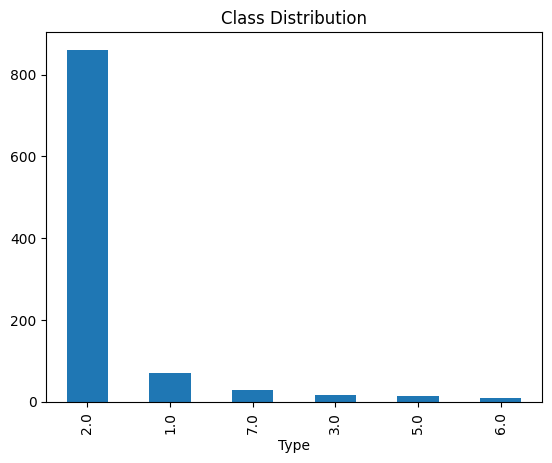

In [17]:
y.value_counts().plot(kind = 'bar')
plt.title('Class Distribution')
plt.show()

# 4: Random Forest Model Implementation

## 1. Divide the data into train and test split.

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42,stratify = y)

## 2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.

In [19]:
RFC = RandomForestClassifier(n_estimators = 100,random_state = 42)
RFC.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

## 3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

In [20]:
y_pred = RFC.predict(X_test)

In [21]:
print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred,zero_division = 1))

Random Forest Classifier Report:
              precision    recall  f1-score   support

         1.0       0.72      0.86      0.78        21
         2.0       0.98      0.98      0.98       258
         3.0       1.00      0.40      0.57         5
         5.0       0.60      0.75      0.67         4
         6.0       1.00      0.00      0.00         3
         7.0       0.78      0.78      0.78         9

    accuracy                           0.94       300
   macro avg       0.85      0.63      0.63       300
weighted avg       0.95      0.94      0.94       300



# 5: Bagging and Boosting Methods
## Apply the Bagging and Boosting methods and compare the results.

### Bagging Classifier 

In [22]:
Bagging = BaggingClassifier(estimator = RandomForestClassifier(),n_estimators = 50,random_state = 42)
Bagging.fit(X_train,y_train)

BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=50,
                  random_state=42)

In [23]:
y_pred_bagging = Bagging.predict(X_test)

In [24]:
cls1 = classification_report(y_pred_bagging,y_test)
print("Bagging Classifier")
print(cls1)

Bagging Classifier
              precision    recall  f1-score   support

         1.0       0.81      0.71      0.76        24
         2.0       0.98      0.97      0.97       261
         3.0       0.20      1.00      0.33         1
         5.0       0.75      0.60      0.67         5
         6.0       0.33      1.00      0.50         1
         7.0       0.78      0.88      0.82         8

    accuracy                           0.94       300
   macro avg       0.64      0.86      0.68       300
weighted avg       0.95      0.94      0.94       300



## Boosting Classifier

## 1.Ada Boost Classifier

In [25]:
Boosting = AdaBoostClassifier(n_estimators = 50,random_state = 42)
Boosting.fit(X_train,y_train)

AdaBoostClassifier(random_state=42)

In [26]:
y_pred_Ada_boost = Boosting.predict(X_test)

In [27]:
cls2 = classification_report(y_pred_Ada_boost,y_test,zero_division =1)
print('Ada Boost Classifier:')
print(cls2)

Ada Boost Classifier:
              precision    recall  f1-score   support

         1.0       0.14      0.60      0.23         5
         2.0       0.99      0.90      0.94       283
         3.0       0.00      1.00      0.00         0
         5.0       0.50      0.40      0.44         5
         6.0       0.00      0.00      0.00         1
         7.0       0.44      0.67      0.53         6

    accuracy                           0.88       300
   macro avg       0.35      0.59      0.36       300
weighted avg       0.95      0.88      0.91       300



## 2.Gradient Boosting Classifier

In [28]:
Gradient_Boost = GradientBoostingClassifier(n_estimators = 50,random_state = 42)
Gradient_Boost.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=50, random_state=42)

In [29]:
y_pred_Grad_Boost = Gradient_Boost.predict(X_test)

In [30]:
cls3 = classification_report(y_pred_Grad_Boost,y_test,zero_division = 1)
print('Gradient Boosting Classifier :')
print(cls3)

Gradient Boosting Classifier :
              precision    recall  f1-score   support

         1.0       0.71      0.71      0.71        21
         2.0       0.98      0.96      0.97       262
         3.0       0.20      0.50      0.29         2
         5.0       0.75      0.50      0.60         6
         6.0       0.00      1.00      0.00         0
         7.0       0.78      0.78      0.78         9

    accuracy                           0.93       300
   macro avg       0.57      0.74      0.56       300
weighted avg       0.94      0.93      0.93       300

